196


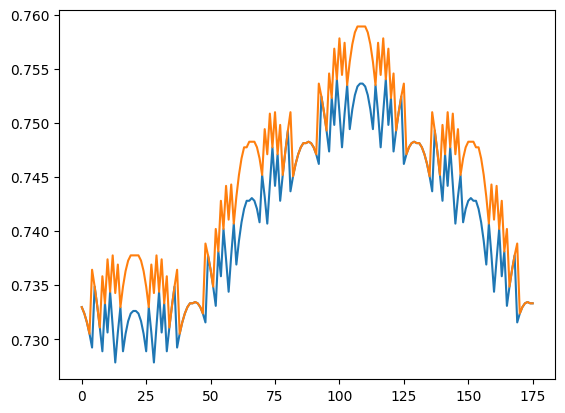

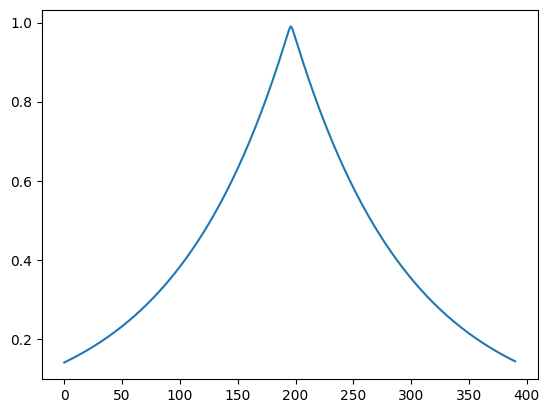

In [9]:
import geometry_cpp as geometry_c
import geometry
import numpy as np
import h5py
import matplotlib.pyplot as plt
def _get_local_scatter(local_dim):
        max_visual_distance = local_dim // 2
        light_decay_rate = 0.01  # Tunable parameter that sets how quickly light
        """Computes effects of absorption and scatter, but incorporates effect of implicit scatter from line spread."""
        x, y = np.arange(local_dim), np.arange(local_dim)
        y = np.expand_dims(y, 1)
        j = max_visual_distance + 1
        positional_mask = (((x - j) ** 2 + (y - j) ** 2) ** 0.5)  # Measure of distance from centre to every pixel
        return np.exp(-light_decay_rate * positional_mask)

masked_sediment = _get_local_scatter(391)
left_eye_pos = [0,0]
prey_locations_array = np.array([])
predator_left, predator_right, predator_distance = np.nan, np.nan, np.nan
masked_arena_pixels = masked_sediment
pr_angles = np.linspace(0, np.pi*2, 300)
pr_rf_size = (np.pi / 180)*2  #
q1 = geometry.read_elevation(50., masked_arena_pixels, left_eye_pos[0], left_eye_pos[1], 50., 0., pr_angles, pr_rf_size, predator_left, predator_right, predator_distance)
q2 = geometry.read_elevation(50., masked_arena_pixels, left_eye_pos[0], left_eye_pos[1], 50., np.pi/2, pr_angles, pr_rf_size, predator_left, predator_right, predator_distance)
q3 = geometry_c.read_elevation(50., masked_arena_pixels, left_eye_pos[0], left_eye_pos[1], 50., 0., pr_angles, pr_rf_size, predator_left, predator_right, predator_distance)
q4 = geometry_c.read_elevation(50., masked_arena_pixels, left_eye_pos[0], left_eye_pos[1], 50., np.pi/2, pr_angles, pr_rf_size, predator_left, predator_right, predator_distance)

eye_FOV_x = int(left_eye_pos[0] + (masked_sediment.shape[1] - 1) / 2)
eye_FOV_y = int(left_eye_pos[1] + (masked_sediment.shape[0] - 1) / 2)

qc1 = geometry.circle_edge_pixels(masked_sediment, (eye_FOV_y, eye_FOV_x), 30)[0]
qc2 = geometry_c.circle_edge_pixels(masked_sediment, (eye_FOV_y, eye_FOV_x), 30)[0]
plt.plot(qc1)
plt.plot(qc2)
# plt.plot(q3)
# plt.plot(q4)
plt.figure()
plt.plot(masked_arena_pixels[391//2,:])
print(np.argmax(masked_arena_pixels[:,391//2]))

In [6]:
qc2[0]

array([0.81852622, 0.81791447, 0.8169009 , 0.82352211, 0.82162694,
       0.81934619, 0.82437308, 0.82120939, 0.82501489, 0.8210011 ,
       0.82352211, 0.82522952, 0.8260915 , 0.8260915 , 0.8260915 ,
       0.8260915 , 0.82522952, 0.82352211, 0.8210011 , 0.82501489,
       0.82120939, 0.82437308, 0.81934619, 0.82162694, 0.82352211,
       0.8169009 , 0.81791447, 0.81852622, 0.81873075, 0.81873075,
       0.81852622, 0.81791447, 0.8169009 , 0.82352211, 0.82162694,
       0.81934619, 0.82437308, 0.82120939, 0.82501489, 0.8210011 ,
       0.82352211, 0.82522952, 0.8260915 , 0.8260915 , 0.8260915 ,
       0.8260915 , 0.82522952, 0.82352211, 0.8210011 , 0.82501489,
       0.82120939, 0.82437308, 0.81934619, 0.82162694, 0.82352211,
       0.8169009 , 0.81791447, 0.81852622, 0.81873075, 0.81873075,
       0.81852622, 0.81791447, 0.8169009 , 0.82352211, 0.82162694,
       0.81934619, 0.82437308, 0.82120939, 0.82501489, 0.8210011 ,
       0.82352211, 0.82522952, 0.8260915 , 0.8260915 , 0.82609

In [ ]:
masked_arena_pixels.dtype